In [1]:
import numpy as np
from utils import display_np_arrays_as_images
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import animation
display_np_arrays_as_images()

In [2]:
ims = np.load('./test_images.npy', allow_pickle=False)
print(ims.shape)
print(ims.dtype)

(6, 96, 96, 3)
float64


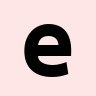

In [3]:
ims[0]

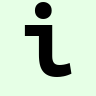

In [4]:
ims[1]

In [5]:
from einops import repeat, reduce, rearrange

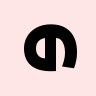

In [6]:
rearrange(ims[0], "h w c -> w h c")

# Decomposition

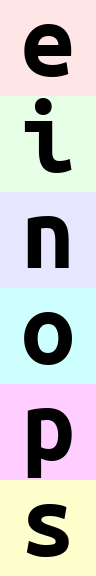

In [7]:
rearrange(ims, "b h w c -> (b h) w c")

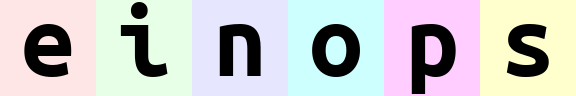

In [8]:
rearrange(ims, 'b h w c -> h (b w) c')

In [9]:
rearrange(ims, 'b h w c -> h (b w) c').shape

(96, 576, 3)

In [10]:
rearrange(ims, 'b h w c -> (b h w c)').shape

(165888,)

# Composition

In [11]:
rearrange(ims, '(b1 b2) h w c -> b1 b2 h w c ', b1=2).shape

(2, 3, 96, 96, 3)

# Decomp and comp

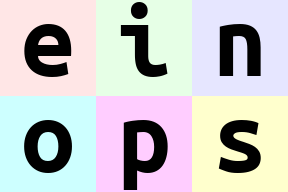

In [12]:
rearrange(ims, '(b1 b2) h w c -> (b1 h) (b2 w) c ', b1=2)

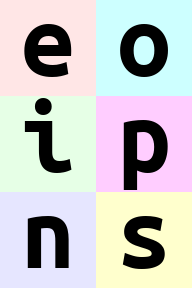

In [13]:
rearrange(ims, '(b1 b2) h w c -> (b2 h) (b1 w) c ', b1=2)

In [14]:
print(rearrange(ims[0], "(h1 h2) w c -> h1 (h2 w) c", h1=32).shape)

(32, 288, 3)


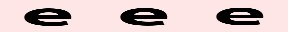

In [15]:
rearrange(ims[0], "(h1 h2) w c -> h1 (h2 w) c", h1=32)

### Understanding duplication

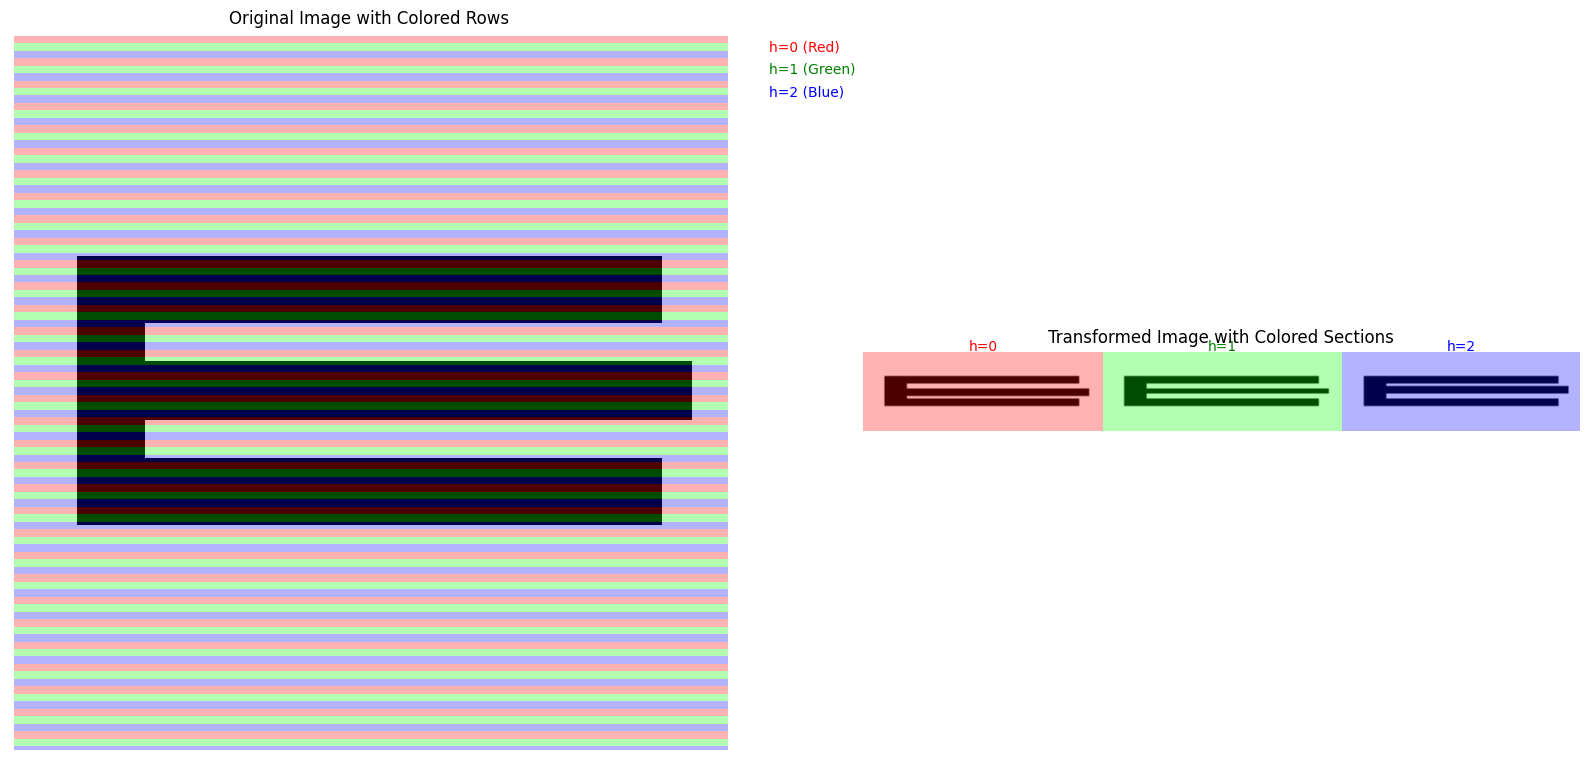

In [16]:
# Create a synthetic image of a letter "e"
def create_letter_e_image(height, width):
    img = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background
    # Draw the letter "e" using rectangles (black color)
    thickness = height // 10
    center = height // 2
    # Horizontal lines
    img[center - thickness * 2:center - thickness, thickness:-thickness] = 0  # Top bar
    img[center - thickness // 2:center + thickness // 2, thickness:-thickness // 2] = 0  # Middle bar
    img[center + thickness:center + thickness * 2, thickness:-thickness] = 0  # Bottom bar
    # Vertical line
    img[center - thickness * 2:center + thickness * 2, thickness:thickness * 2] = 0  # Vertical bar
    return img

# Parameters
original_height = 96
original_width = 96
h1 = 32  # Number of vertical slices
h2 = original_height // h1  # Height of each strip (should be 3)

# Create the original image
original_image = create_letter_e_image(original_height, original_width)

# Step 1: Reshape the image into (h1, h2, w, c)
reshaped = original_image.reshape(h1, h2, original_width, 3)

# Step 2: Rearrange each strip by flattening the h2 and w dimensions
rearranged_strips = []
for i in range(h1):
    strip = reshaped[i]  # Shape: (h2, w, 3)
    # Flatten h2 and w dimensions
    rearranged_strip = strip.reshape(1, h2 * original_width, 3)
    rearranged_strips.append(rearranged_strip)

# Stack the rearranged strips vertically to form the final image
final_image = np.vstack(rearranged_strips)  # Shape: (h1, h2 * w, 3)

# Visualization
# Create colors for h=0, h=1, h=2
row_colors = [(1, 0, 0, 0.3),  # Red with transparency
              (0, 1, 0, 0.3),  # Green with transparency
              (0, 0, 1, 0.3)]  # Blue with transparency

# Visualize the mapping
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Original Image with Row Colors
ax[0].imshow(original_image)
ax[0].set_title('Original Image with Colored Rows')
ax[0].axis('off')

# Overlay colors on the original image
for i in range(h1):
    y_start = i * h2
    for j in range(h2):
        rect = Rectangle((0, y_start + j), original_width, 1,
                         linewidth=0, edgecolor=None,
                         facecolor=row_colors[j],
                         transform=ax[0].transData)
        ax[0].add_patch(rect)

# Add annotations to indicate h=0, h=1, h=2
ax[0].text(original_width + 5, h2 / 2, 'h=0 (Red)', color='red', va='center')
ax[0].text(original_width + 5, h2 * 1.5, 'h=1 (Green)', color='green', va='center')
ax[0].text(original_width + 5, h2 * 2.5, 'h=2 (Blue)', color='blue', va='center')

# Transformed Image with Sections Colored
ax[1].imshow(final_image)
ax[1].set_title('Transformed Image with Colored Sections')
ax[1].axis('off')

# Overlay colors on the transformed image
section_width = original_width  # 96 pixels
for i in range(3):
    x_start = i * section_width
    rect = Rectangle((x_start, 0), section_width, final_image.shape[0],
                     linewidth=0, edgecolor=None,
                     facecolor=row_colors[i],
                     transform=ax[1].transData)
    ax[1].add_patch(rect)

# Add annotations to indicate the sections
ax[1].text(section_width / 2, -5, 'h=0', color='red', ha='center', va='top')
ax[1].text(section_width * 1.5, -5, 'h=1', color='green', ha='center', va='top')
ax[1].text(section_width * 2.5, -5, 'h=2', color='blue', ha='center', va='top')

plt.tight_layout()
plt.show()

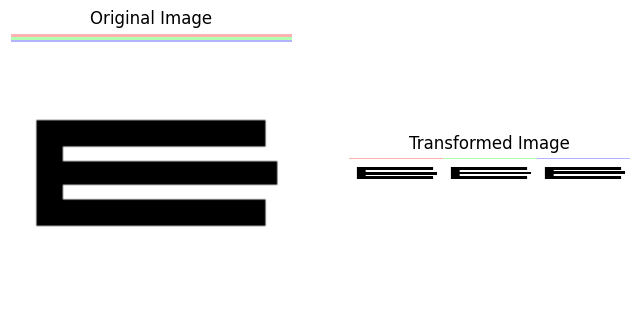

In [17]:
# Function to create the letter "e" image
def create_letter_e_image(height, width):
    img = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background
    # Draw the letter "e" using rectangles (black color)
    thickness = height // 10
    center = height // 2
    # Horizontal lines
    img[center - thickness * 2:center - thickness, thickness:-thickness] = 0  # Top bar
    img[center - thickness // 2:center + thickness // 2, thickness:-thickness // 2] = 0  # Middle bar
    img[center + thickness:center + thickness * 2, thickness:-thickness] = 0  # Bottom bar
    # Vertical line
    img[center - thickness * 2:center + thickness * 2, thickness:thickness * 2] = 0  # Vertical bar
    return img

# Parameters
original_height = 96
original_width = 96
h1 = 32  # Number of vertical slices
h2 = original_height // h1  # Height of each strip (should be 3)

# Create the original image
original_image = create_letter_e_image(original_height, original_width)

# Reshape the image into (h1, h2, w, c)
reshaped = original_image.reshape(h1, h2, original_width, 3)

# Set up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Titles and axes off
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

# Display the initial images
original_display = ax[0].imshow(original_image)
transformed_image = np.ones((h1, h2 * original_width, 3), dtype=np.uint8) * 255  # Start with a white canvas
transformed_display = ax[1].imshow(transformed_image)

# Colors for highlighting
row_colors = [(1, 0, 0, 0.3),  # Red with transparency
              (0, 1, 0, 0.3),  # Green with transparency
              (0, 0, 1, 0.3)]  # Blue with transparency

from matplotlib.colors import ListedColormap

def animate(i):
    # Clear previous rectangles
    [p.remove() for p in reversed(ax[0].patches)]
    [p.remove() for p in reversed(ax[1].patches)]
    
    # Index of the current strip
    strip_idx = i % h1
    
    # In the original image
    y_start = strip_idx * h2
    # Highlight the current strip in the original image
    for j in range(h2):
        rect = Rectangle((0, y_start + j), original_width, 1,
                         linewidth=0, edgecolor=None,
                         facecolor=row_colors[j],
                         transform=ax[0].transData)
        ax[0].add_patch(rect)
    
    # Extract the current strip
    strip = reshaped[strip_idx]  # Shape: (h2, w, 3)
    # Flatten h2 and w dimensions to get the rearranged strip
    rearranged_strip = strip.reshape(1, h2 * original_width, 3)
    
    # Place the rearranged strip in the transformed image
    transformed_image[strip_idx] = rearranged_strip[0]
    
    # Update the transformed image display
    transformed_display.set_data(transformed_image)
    
    # Highlight the corresponding section in the transformed image
    section_width = original_width
    for k in range(3):
        x_start = k * section_width
        rect = Rectangle((x_start, strip_idx), section_width, 1,
                         linewidth=0, edgecolor=None,
                         facecolor=row_colors[k],
                         transform=ax[1].transData)
        ax[1].add_patch(rect)
    
    return original_display, transformed_display

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=h1, interval=200, blit=False, repeat=False)

# Display the animation (for Jupyter notebooks)
from IPython.display import HTML
HTML(anim.to_jshtml())

# To save the animation, uncomment one of the following lines:
# anim.save('rearrangement_animation.mp4', writer='ffmpeg')
# anim.save('rearrangement_animation.gif', writer='pillow')

## More Decomposition

In [18]:
ims.shape

(6, 96, 96, 3)

In [19]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2).shape

(192, 288, 3)

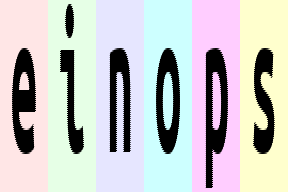

In [20]:
rearrange(ims, 'b h (w w2) c -> (h w2) (b w) c', w2=2)

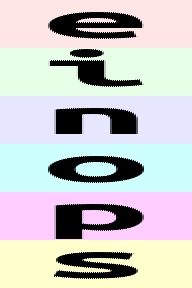

In [21]:
rearrange(ims, "b (h h2) w c -> (b h) (w h2) c", h2=2)

## Order of Axes matters

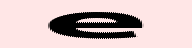

In [23]:
rearrange(ims[0], "(h h2) w c -> h (w h2) c", h2=2)

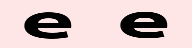

In [24]:
rearrange(ims[0], "(h h2) w c -> h (h2 w) c", h2=2)

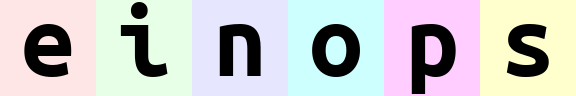

In [25]:
rearrange(ims, 'b h w c -> h (b w) c')

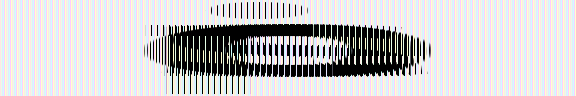

In [26]:
# order of axes in composition is different
# rule is just as for digits in the number: leftmost digit is the most significant, 
# while neighboring numbers differ in the rightmost axis.

# you can also think of this as lexicographic sort

rearrange(ims, 'b h w c -> h (w b) c')
# think like 10s place and ones place, b varies faster and w slower

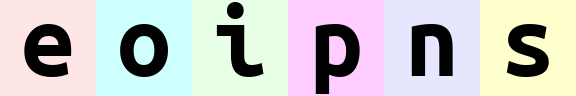

In [27]:
rearrange(ims, '(b1 b2) h w c -> h (b2 b1 w) c ', b1=2) # produces 'eoipns'
# think of dividing the batch in 2 strips
# [e, i, n, o, p, s] -> [e, i, n], [o, p, s]
# Then take in order from each like e, then o, then i, then p, then n, then s

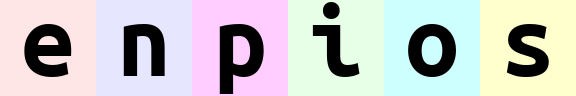

In [28]:
rearrange(ims, "(b1 b2) h w c -> h (b2 b1 w) c", b1=3)
# [e, i, n, o, p, s] -> [e, i], [n, o], [p, s]
# enpios

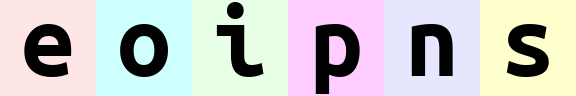

In [29]:
rearrange(ims, "(b1 b2) h w c -> h (b2 b1 w) c", b2=3)
# Now I suppose specify the value of b2 instead of b1
# it goes back to the initial eoipns (2 cells ago)
# Basically, the first one is taken as the number of groups, and the 2nd one as number of items per group

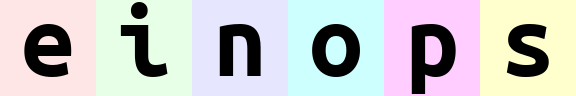

In [30]:
rearrange(ims, "(b1 b2 b3) h w c -> h (b2 b3 b1 w) c", b2=3, b3=2)
# b1 is basically a dummy dimension here, 
# if we dont change the relative order of b3 and b2, image will remain the same

## Trying to make it interesting by working with more

In [31]:
ims.shape

(6, 96, 96, 3)

In [32]:
new_ims = np.repeat(ims, axis=0, repeats=2) # duplicating along batch axis

In [33]:
new_ims = np.tile(ims, (2, 1, 1, 1))

In [34]:
new_ims.shape

(12, 96, 96, 3)

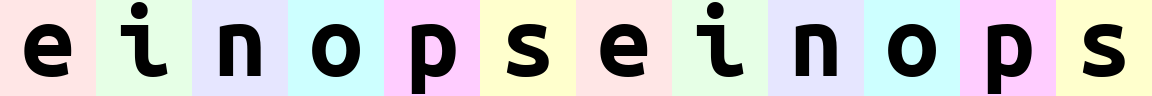

In [35]:
# Lets display first
rearrange(new_ims, "b h w c -> h (b w) c")

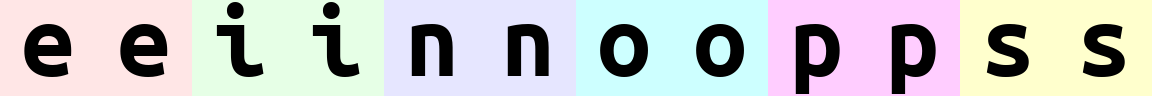

In [36]:
rearrange(new_ims, "(b1 b2 b3) h w c -> h (b2 b3 b1 w) c", b2=3, b3=2)
# b1 is basically a dummy dimension here, 
# if we dont change the relative order of b3 and b2, image will remain the same
# [e i n o p s] <- b1
# [e i n o p s] <- b1
# for each b1, b2 will be [e i n] [o p s] and b3 will be each element in there
# b1 varies most often, then b3 then b2

# Reason out this rearrangement - final

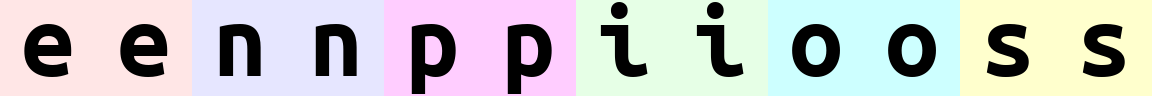

In [37]:
rearrange(new_ims, "(b1 b2 b3) h w c -> h (b3 b2 b1 w) c", b2=3, b3=2)
# Always think of rearrangement as first decomp, then reorder in these cases

So, first b -> b1 b2 b3 = (2, 3, 2)

So first reshape (6, 96, 96, 3) -> (2, 3, 2, 96, 96, 3)

Then reorder

So divide into 2 groups, each having 3 subgroup with 2 elements each (this last part is automatically figured out)

So 
```
G1 -> [
        [e, i],
        [n, o],
        [p, s]
    ]

G2 -> [
        [e, i],
        [n, o],
        [p, s]
    ]
```
b2 selects the subgroup, and b3 indexes INSIDE each sub group, so b3 finally selects each element

In the reordering, b1 varies first (fastest), then b2 and finally b3 (slowest)

## Reductions

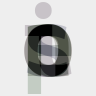

In [38]:
# average over batch
reduce(ims, 'b h w c -> h w c', 'mean')

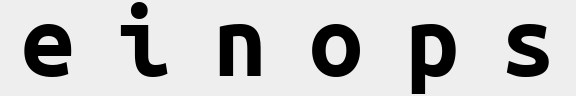

In [39]:
# average over channels for each image indiv, so convert to grayscale
reduce(ims, 'b h w c -> h (b w)', 'mean')

In [40]:
ims.shape

(6, 96, 96, 3)

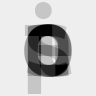

In [41]:
# Example of reducing of several axes 
# besides mean, there are also min, max, sum, prod
reduce(ims, 'b h w c -> h w', 'mean')

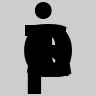

In [42]:
reduce(ims, 'b h w c -> h w', 'min')

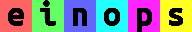

In [43]:
# Makes colours more saturated as well as downsamples - pooling 3x3 patches
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'prod', h2=3, w2=3)

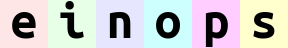

In [44]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'mean', h2=2, w2=2)
# Mean pooling 2x2 patches - smoothens it out
# Useful for reducing image size, reducing noise, preserving overall brightness and patterns

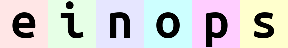

In [45]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'max', h2=2, w2=2)
# Max pooling - not as smooth but focuses on strong activations, highlighting most prominent features - like edges and textures

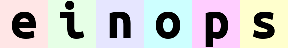

In [46]:
reduce(ims, 'b (h h2) (w w2) c -> h (b w) c', 'min', h2=2, w2=2)
# Min pooling focuses on darker features

Max pooling better when background is dark and brighter things need to be focused on, opposite for min pooling.

In [47]:
assert reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2).shape == (288, 192)
print("Shape matched")
# mean across channels, so 1 channel only
# b1 = 2, b2 = 3
# (3*96, 2*96) = (288, 192)

Shape matched


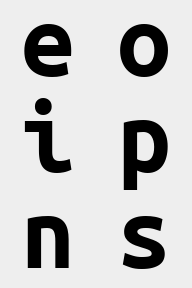

In [48]:
reduce(ims, '(b1 b2) h w c -> (b2 h) (b1 w)', 'mean', b1=2)

## Stack and concatenate

In [49]:
# rearrange can also take care of lists of arrays with the same shape
x = list(ims)
print(type(x), 'with', len(x), 'tensors of shape', x[0].shape)
# that's how we can stack inputs
# "list axis" becomes first ("b" in this case), and we left it there
rearrange(x, 'b h w c -> b h w c').shape

<class 'list'> with 6 tensors of shape (96, 96, 3)


(6, 96, 96, 3)

In [50]:
type(rearrange(x, 'b h w c -> b h w c'))

numpy.ndarray

In [51]:
# but new axis can appear in the other place:
rearrange(x, 'b h w c -> h w c b').shape

(96, 96, 3, 6)

In [52]:
# ... or we can concatenate along axes
rearrange(x, 'b h w c -> h (b w) c').shape

(96, 576, 3)

## Addition or Removal of Axes

In [53]:
x = rearrange(ims, 'b h w c -> b 1 h w 1 1 c') # functionality of numpy.expand_dims
print(x.shape)
print(rearrange(x, 'b 1 h w 1 1 c -> b h w c').shape) # functionality of numpy.squeeze

(6, 1, 96, 96, 1, 1, 3)
(6, 96, 96, 3)


() and 1 are synonyms and create axes of unit length

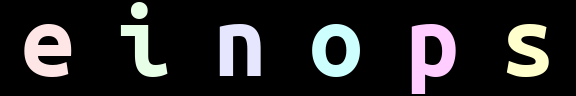

In [54]:
# compute max in each image individually, then show a difference 
x = reduce(ims, 'b h w c -> b () () c', 'max') - ims
rearrange(x, 'b h w c -> h (b w) c')

## Repeating Elements

In [69]:
test = repeat(ims[0], "h w c -> h new_axis w c", new_axis=5)

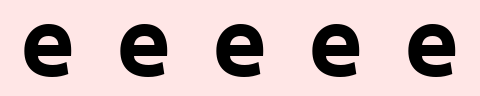

In [70]:
rearrange(test, "h w b c -> h (w b) c")

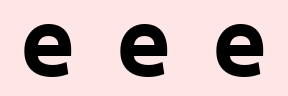

In [75]:
repeat(ims[0], 'h w c -> h (repeat w) c', repeat=3)

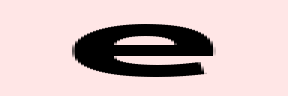

In [73]:
repeat(ims[0], 'h w c -> h (w repeat) c', repeat=3)


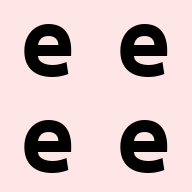

In [74]:
repeat(ims[0], 'h w c -> (2 h) (2 w) c')


In [91]:
repeated = repeat(ims, 'b h w c -> b h new_axis w c', new_axis=2)
reduced = reduce(repeated, 'b h new_axis w c -> b h w c', 'min')
assert np.array_equal(ims, reduced)